In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_t1_snr = pd.read_csv(r'C:\Users\admin\Documents\ncan-classifier-validation\SNR_Test_1_Long.csv')
df_t2_snr = pd.read_csv(r'C:\Users\admin\Documents\ncan-classifier-validation\SNR_Test2_Long.csv')

df_t1_score = pd.read_csv(r'C:\Users\admin\Documents\ncan-classifier-validation\Score_T1_Long.csv')
df_t2_score = pd.read_csv(r'C:\Users\admin\Documents\ncan-classifier-validation\Score_T2_Long.csv')

## SNR Test 1

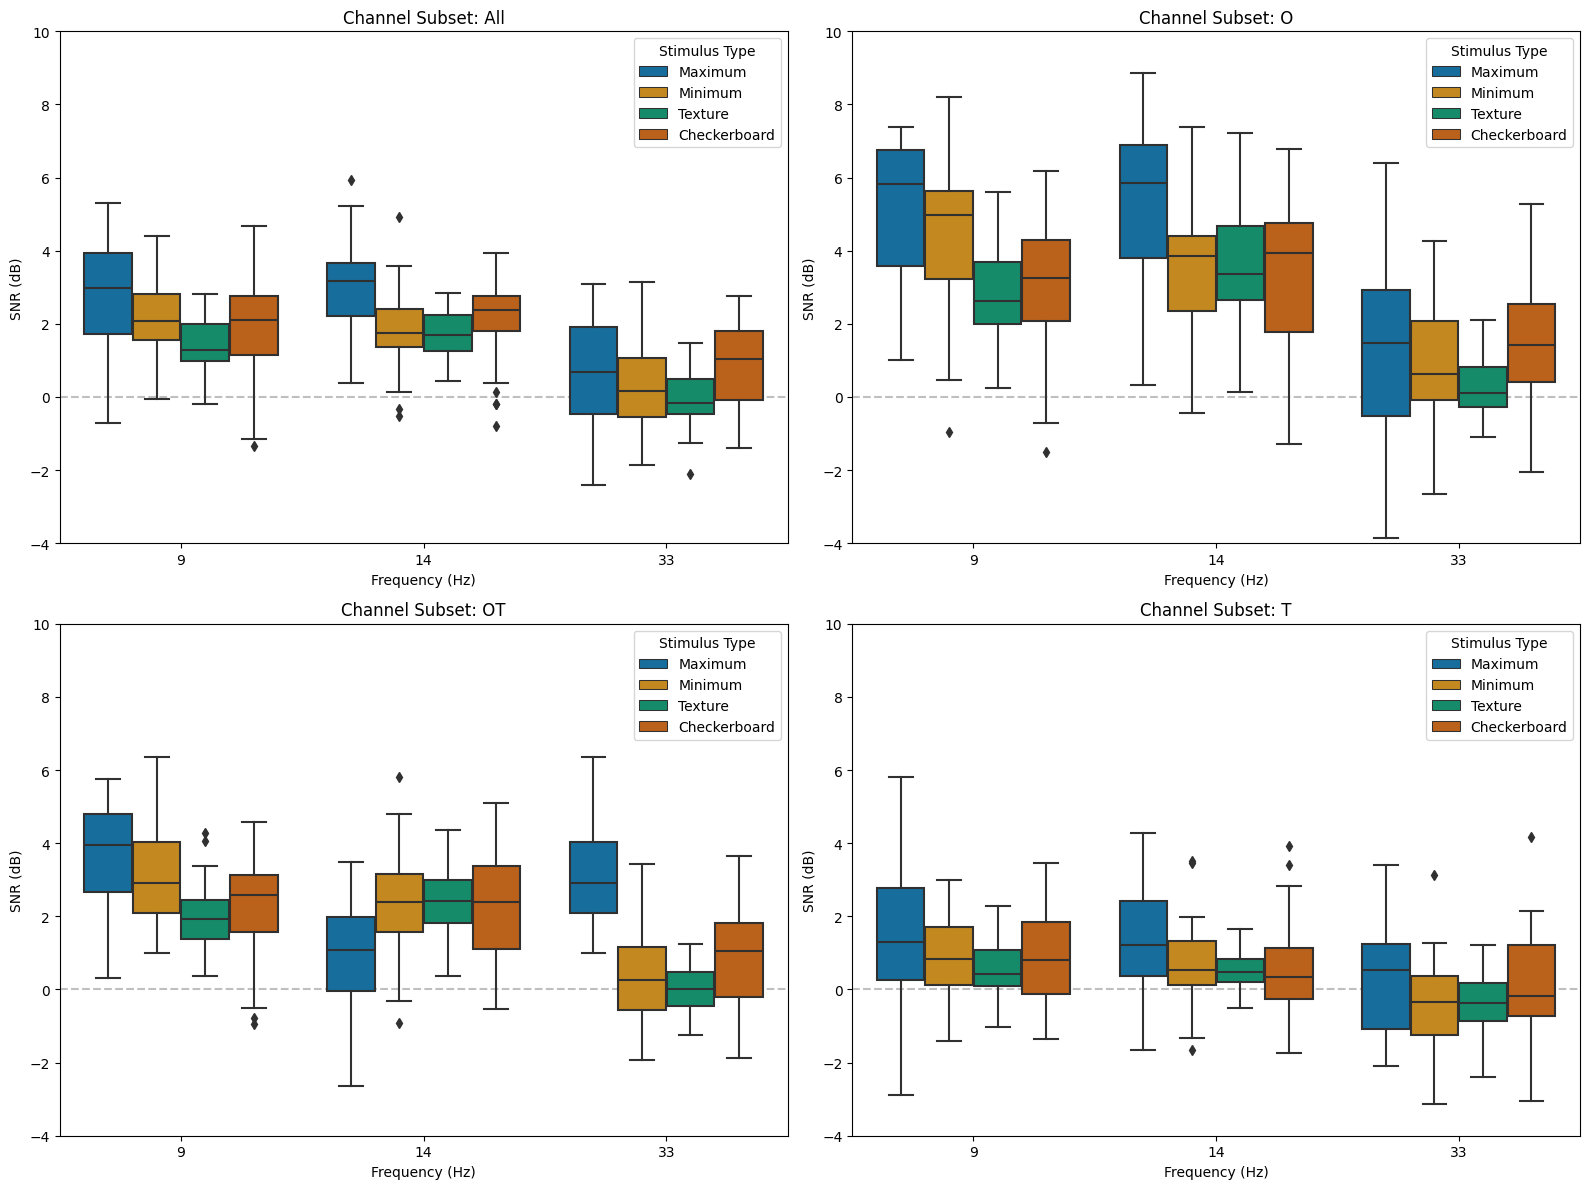

In [4]:
save_plots = False

# Define the custom order for StimulusType
stimulus_order = ['Maximum', 'Minimum', 'Texture', 'Checkerboard']

# Set the category order for the StimulusType column in the DataFrame
df_t1_snr['StimulusType'] = pd.Categorical(df_t1_snr['StimulusType'], categories=stimulus_order, ordered=True)

# Set up the figure and axes for the panel plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Iterate over each channel subset and create a box plot
for subset, ax in zip(['All', 'O', 'OT', 'T'], axes.flat):
    sns.boxplot(
        x='Frequency', 
        y='SNR', 
        hue='StimulusType', 
        data=df_t1_snr[df_t1_snr['ChannelSubset'] == subset], 
        ax=ax,
        palette='colorblind',
    )
    
    ax.set_title(f'Channel Subset: {subset}')
    ax.set_ylabel("SNR (dB)")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylim(-4, 10)
    ax.legend(title='Stimulus Type')

    #ax.set_xticklabels(['Max', 'Min', 'Tex', 'Chkb'])

    ax.axhline(0, color='gray', linestyle='--', alpha = 0.5, zorder = 0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures/SNR_T1.svg")


## SNR Test 2

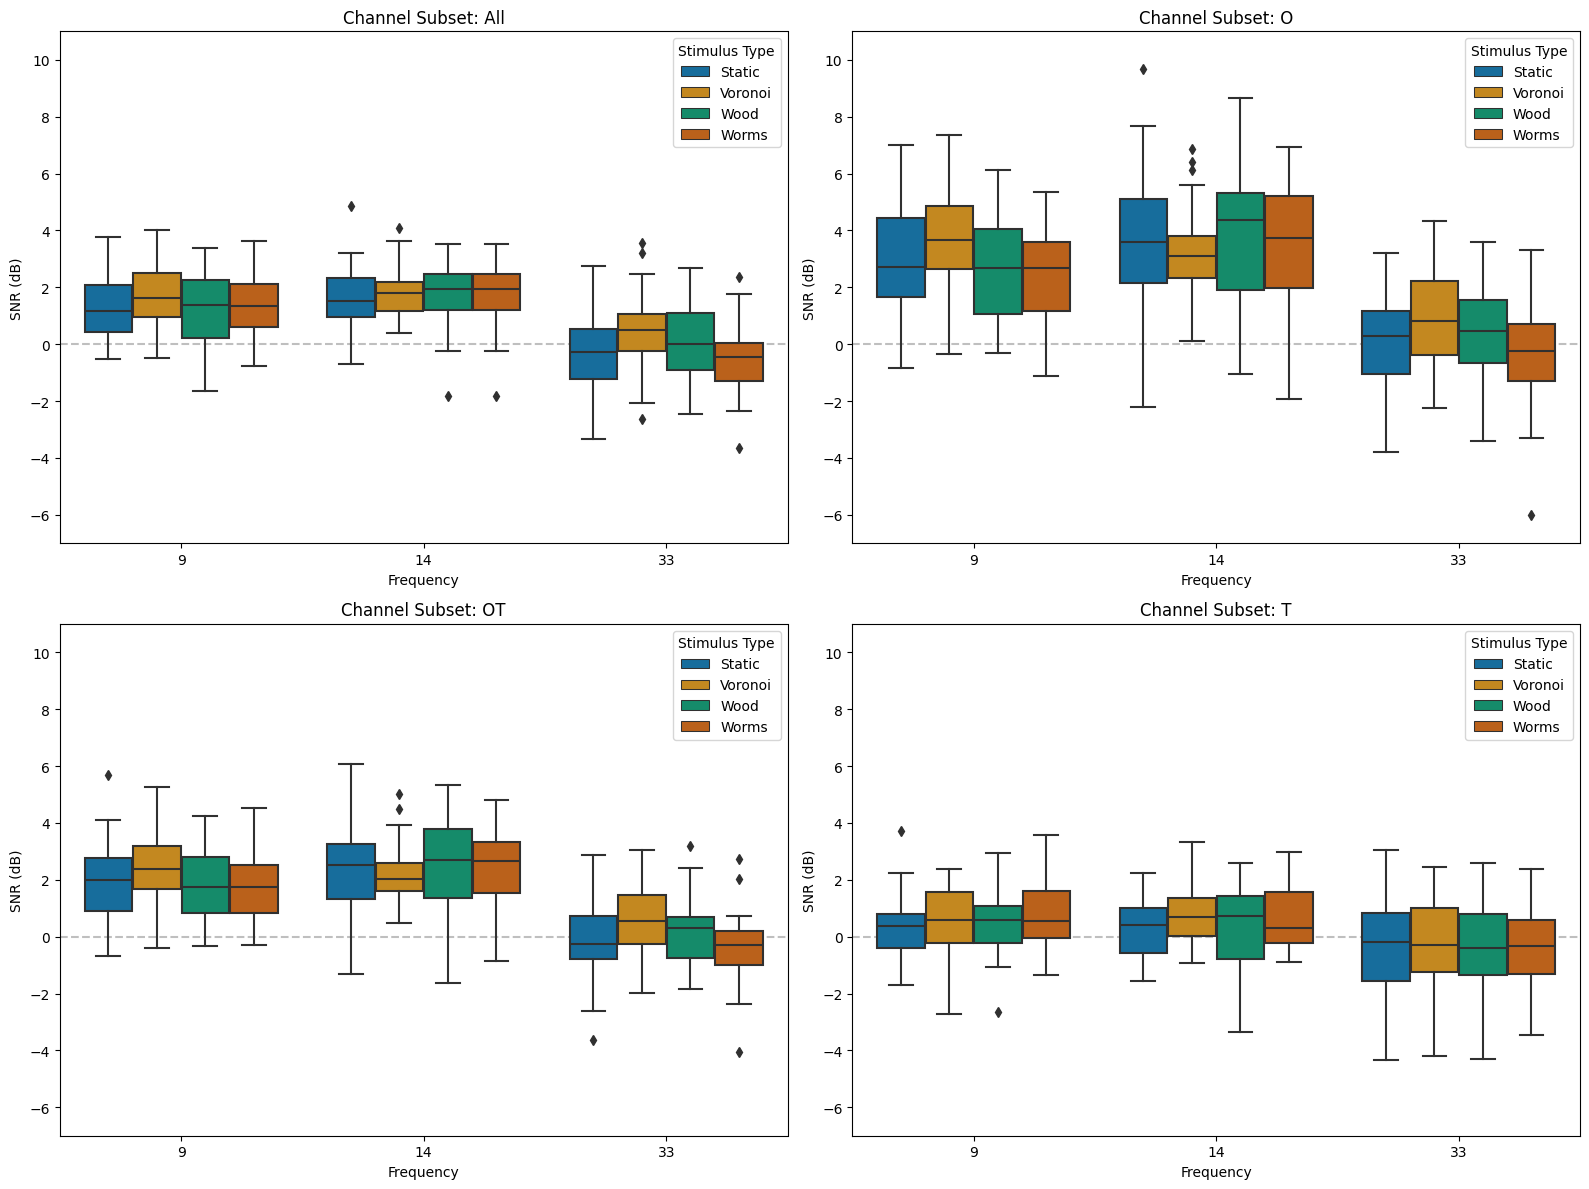

In [5]:
save_plots = False 

# Set up the figure and axes for the panel plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Iterate over each channel subset and create a box plot
for subset, ax in zip(['All', 'O', 'OT', 'T'], axes.flat):
    sns.boxplot(
        x='Frequency', 
        y='SNR', 
        hue='StimulusType', 
        data=df_t2_snr[df_t2_snr['Channel_Subset'] == subset], 
        ax=ax,
        palette= 'colorblind',
        
    )
    
    ax.set_title(f'Channel Subset: {subset}')
    ax.set_ylabel("SNR (dB)")
    ax.set_ylim(-7,11)
    ax.legend(title='Stimulus Type')

    ax.axhline(0, color='gray', linestyle='--', alpha = 0.5, zorder = 0)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures/SNR_T2.svg")

## Score Test 1

C:\Users\admin\AppData\Local\Temp\ipykernel_6768\494433114.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([' ','1', '2', '3', '4', '5', '6', '7'])


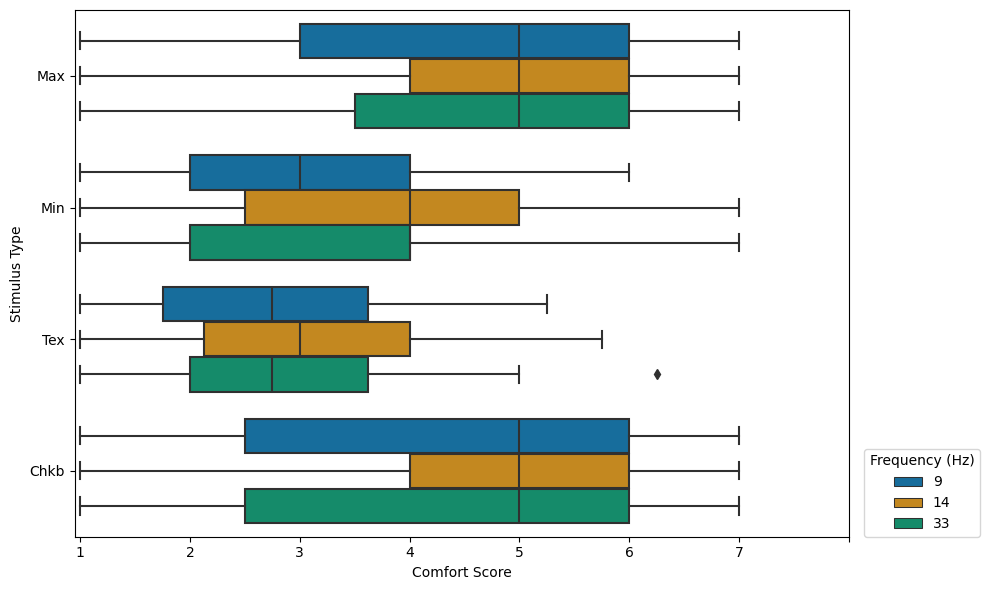

In [6]:
save_plots = False  # Set to True to save the plot

# Define the fig object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot with frequency on the x-axis
sns.boxplot(
    x='Score', 
    y='StimulusType', 
    hue='Frequency', 
    data=df_t1_score,
    palette='colorblind',
    ax=ax
)

ax.set_ylabel('Stimulus Type')
ax.set_xlabel('Comfort Score')
ax.legend(title='Frequency (Hz)', loc=(1.02, 0))
ax.set_yticklabels(['Max', 'Min', 'Tex', 'Chkb'])
ax.set_xlim(0.95,8)
ax.set_xticklabels([' ','1', '2', '3', '4', '5', '6', '7'])
plt.tight_layout()

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_T1.svg")


C:\Users\admin\AppData\Local\Temp\ipykernel_6768\978436448.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])
C:\Users\admin\AppData\Local\Temp\ipykernel_6768\978436448.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])


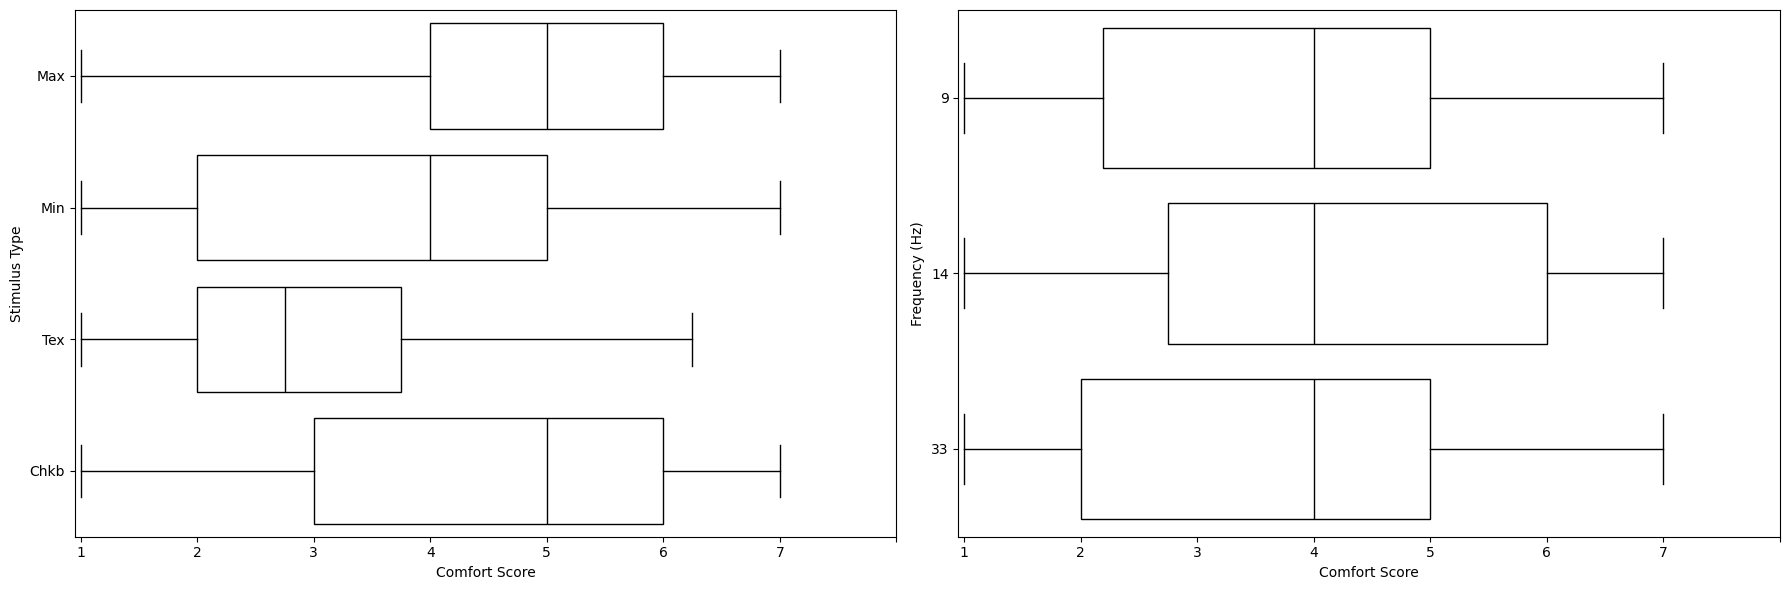

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_t1_score is your DataFrame
# Convert 'Frequency' column to ordered categorical data
df_t1_score['Frequency'] = pd.Categorical(df_t1_score['Frequency'], categories=[9, 14, 33], ordered=True)

# Set to True to save the plot
save_plots = True  

# Define the fig objects and axes for the 2x1 panel plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Create boxplot for stimulus type data
sns.boxplot(
    x='Score', 
    y='StimulusType', 
    boxprops={"facecolor": (1,1,1), "edgecolor": (0,0,0)},
    linewidth = 1,
    data=df_t1_score,
    ax=axes[0]  # Use the first subplot
)

# Remove fill for the boxes in the stimulus type plot
for box in axes[0].artists:
    box.set_facecolor('none')

axes[0].set_ylabel('Stimulus Type')
axes[0].set_xlabel('Comfort Score')
axes[0].set_yticklabels(['Max', 'Min', 'Tex', 'Chkb'])
axes[0].set_xlim(0.95, 8)
axes[0].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])

# Create boxplot for frequency data
sns.boxplot(
    x='Score', 
    y='Frequency', 
    data=df_t1_score,
    boxprops={"facecolor": (1,1,1), "edgecolor": (0,0,0)},
    linewidth = 1,
    ax=axes[1]  # Use the second subplot
)

axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_xlabel('Comfort Score')
axes[1].set_xlim(0.95, 8)
axes[1].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])

plt.setp(axes[0].lines, color="black")
plt.setp(axes[1].lines, color="black")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_T1_Split.svg")


## Histograms

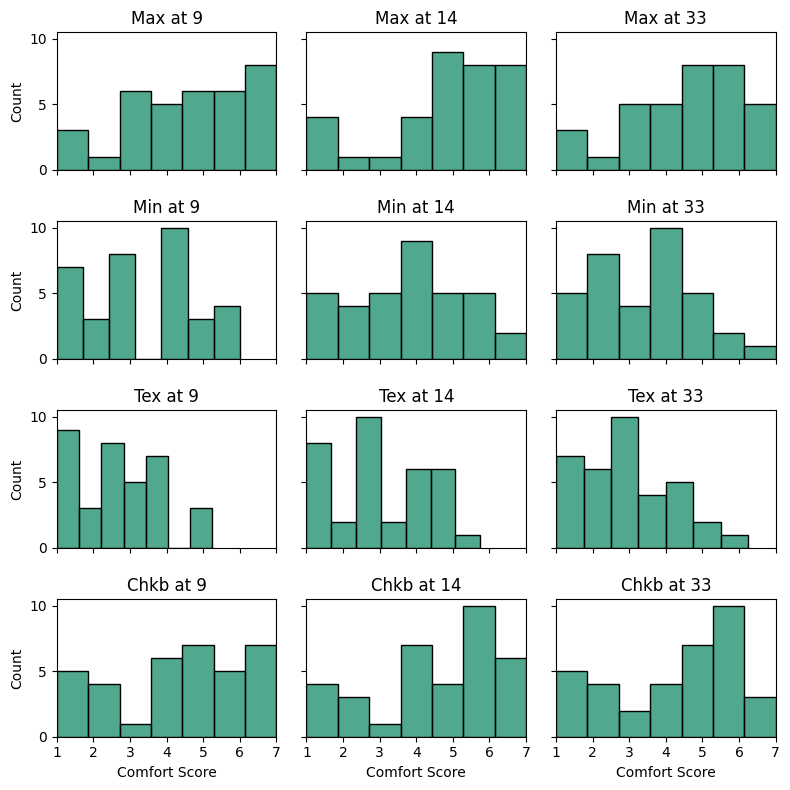

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

save_plots = False # Set to True to save the plot

# Define unique stimulus types and frequencies
stimulus_types = ['Maximum', 'Minimum', 'Texture', 'Checkerboard']
stimulus_labels = ['Max', 'Min', 'Tex', 'Chkb']
frequencies = [9, 14, 33]

# Create a grid of subplots (4 stimuli * 3 frequencies = 12 plots)
fig, axes = plt.subplots(4, 3, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Loop over each stimulus type and frequency and create a histogram
for i, stimulus in enumerate(stimulus_types):
    for j, frequency in enumerate(frequencies):
        idx = i * 3 + j
        sns.histplot(
            data=df_t1_score[(df_t1_score['StimulusType'] == stimulus) & (df_t1_score['Frequency'] == frequency)], 
            x='Score', 
            ax=axes[idx],
            kde=False,
            bins=7,
            color = '#158b6a',
            fill=True
        )

        axes[idx].set_title(f'{stimulus_labels[i]} at {frequency}')
        axes[idx].set_xlabel('Comfort Score')
        axes[idx].set_ylabel('Count')
        axes[idx].set_xlim(1, 7)
        axes[idx].set_xticks(range(1, 8))

# Adjust layout
plt.tight_layout(h_pad = 1.5, w_pad = 1.5)

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_Histogram_T1.svg")


## Score Test 2

C:\Users\admin\AppData\Local\Temp\ipykernel_6768\3412646250.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7'])


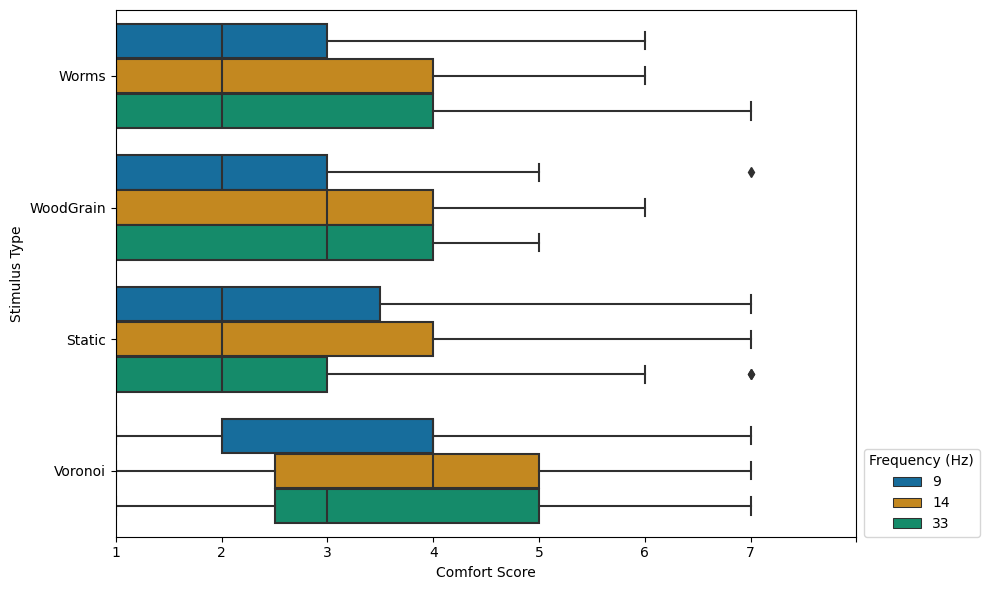

In [9]:
save_plots = False  # Set to True to save the plot

# Define the fig object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot with frequency on the x-axis
sns.boxplot(
    x='Score', 
    y='StimulusType', 
    hue='Frequency', 
    data=df_t2_score,
    palette='colorblind',
    ax=ax
)

ax.set_ylabel('Stimulus Type')
ax.set_xlabel('Comfort Score')
ax.legend(title='Frequency (Hz)', loc=(1.01, 0))
ax.set_xlim(1,8)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7'])
ax.set_yticklabels(['Worms', 'WoodGrain', 'Static', 'Voronoi'])

plt.tight_layout()

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_T2.svg")


C:\Users\admin\AppData\Local\Temp\ipykernel_6768\4238583351.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])
C:\Users\admin\AppData\Local\Temp\ipykernel_6768\4238583351.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])


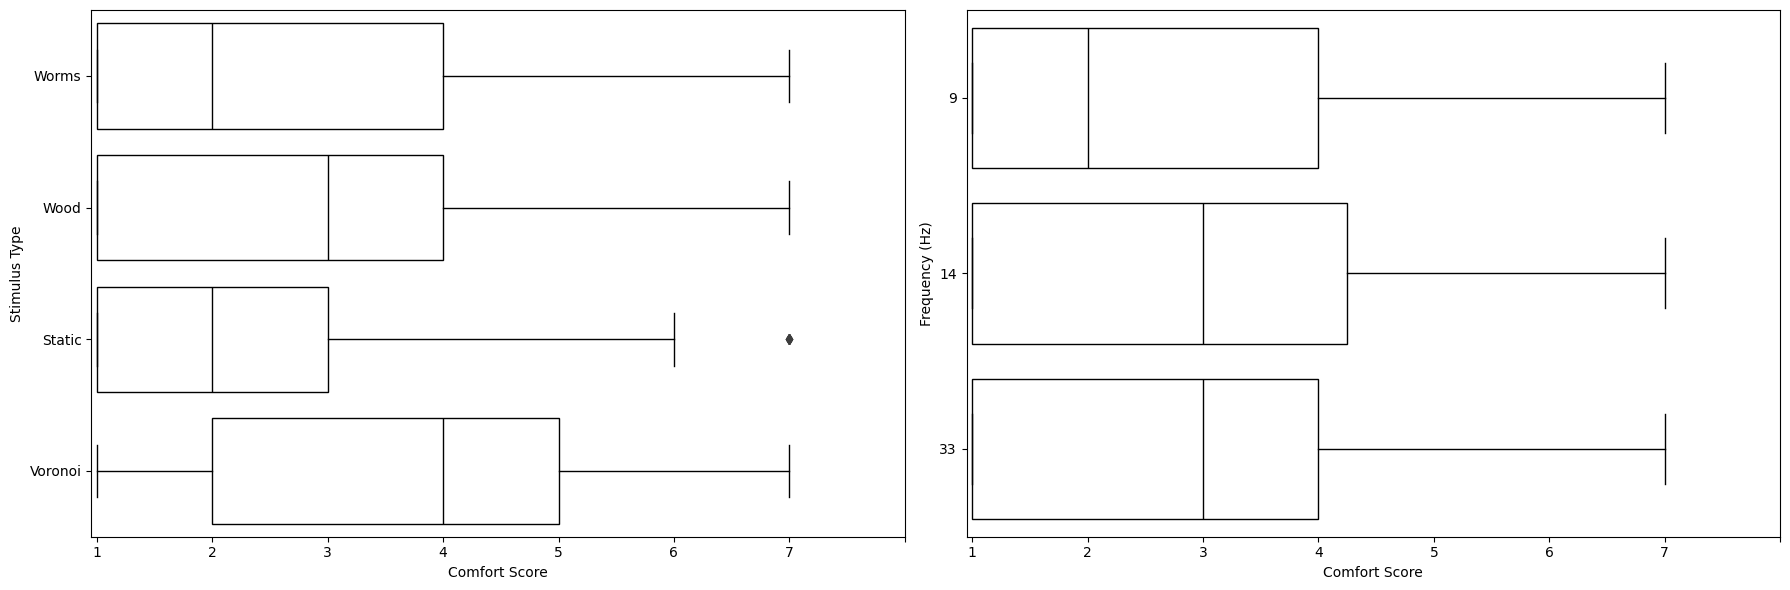

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_t1_score is your DataFrame
# Convert 'Frequency' column to ordered categorical data
df_t2_score['Frequency'] = pd.Categorical(df_t2_score['Frequency'], categories=[9, 14, 33], ordered=True)

# Set to True to save the plot
save_plots = True

# Define the fig objects and axes for the 2x1 panel plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Create boxplot for stimulus type data
sns.boxplot(
    x='Score', 
    y='StimulusType', 
    boxprops={"facecolor": (1,1,1), "edgecolor": (0,0,0)},
    linewidth = 1,
    data=df_t2_score,
    ax=axes[0]  # Use the first subplot
)

# Remove fill for the boxes in the stimulus type plot
for box in axes[0].artists:
    box.set_facecolor('none')

axes[0].set_ylabel('Stimulus Type')
axes[0].set_xlabel('Comfort Score')
axes[0].set_xlim(0.95, 8)
axes[0].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])

# Create boxplot for frequency data
sns.boxplot(
    x='Score', 
    y='Frequency', 
    data=df_t2_score,
    boxprops={"facecolor": (1,1,1), "edgecolor": (0,0,0)},
    linewidth = 1,
    ax=axes[1]  # Use the second subplot
)

axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_xlabel('Comfort Score')
axes[1].set_xlim(0.95, 8)
axes[1].set_xticklabels([' ', '1', '2', '3', '4', '5', '6', '7'])

plt.setp(axes[0].lines, color="black")
plt.setp(axes[1].lines, color="black")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_T2_Split.svg")


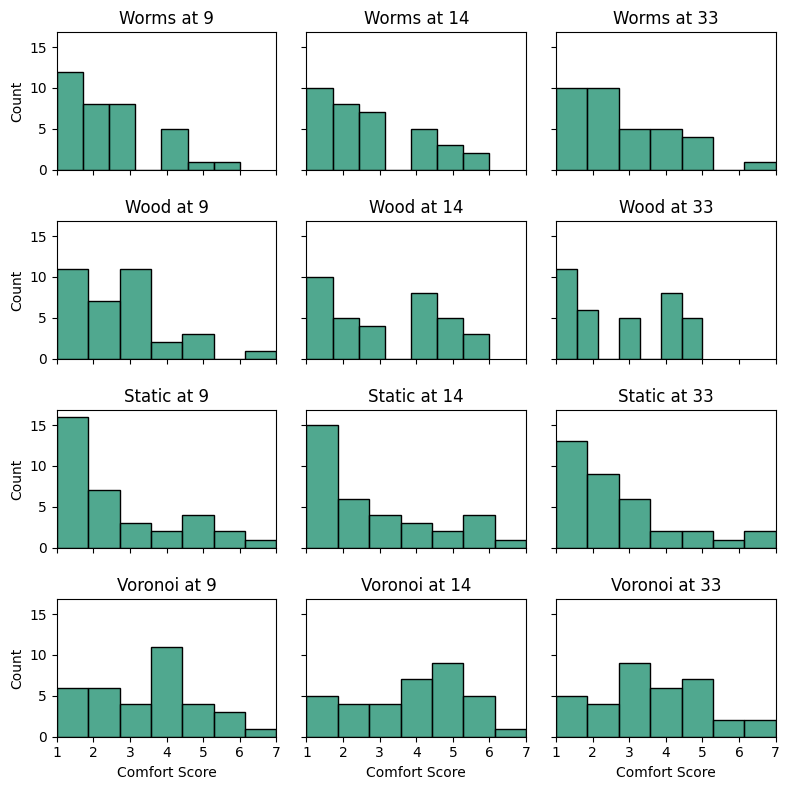

In [11]:
save_plots = False # Set to True to save the plot

# Define unique stimulus types and frequencies
stimulus_types = ['Worms','Wood', 'Static', 'Voronoi']
frequencies = [9, 14, 33]

# Create a grid of subplots (4 stimuli * 3 frequencies = 12 plots)
fig, axes = plt.subplots(4, 3, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Loop over each stimulus type and frequency and create a histogram
for i, stimulus in enumerate(stimulus_types):
    for j, frequency in enumerate(frequencies):
        idx = i * 3 + j
        sns.histplot(
            data=df_t2_score[(df_t2_score['StimulusType'] == stimulus) & (df_t2_score['Frequency'] == frequency)], 
            x='Score', 
            ax=axes[idx],
            kde=False,
            bins=7,
            color = '#158b6a',
            fill=True
        )

        axes[idx].set_title(f'{stimulus_types[i]} at {frequency}')
        axes[idx].set_xlabel('Comfort Score')
        axes[idx].set_ylabel('Count')
        axes[idx].set_xlim(1, 7)
        axes[idx].set_xticks(range(1, 8))

# Adjust layout
plt.tight_layout(h_pad = 1.5, w_pad = 1.5)

# Show the plot
plt.show()

if save_plots:
    fig.savefig(r"C:\Users\admin\Documents\ncan-classifier-validation\Figures\Score_Histogram_T2.svg")
